Simple Linear Regression Algorithm using Python

Step-1:Data Preprocessing

In [1]:
#importing libraries 
import numpy as num
import matplotlib.pyplot as plt
import pandas as pd

#loading the dataset into code
data_set = pd.read_csv('Salary_Data.csv')
data_set.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


We are going to extract the dependant and independant variables for the dataset.

In [2]:
# independant means experience
x = data_set.iloc[:, :-1].values
# dependant means salary
y = data_set.iloc[:, 1].values

# printing the independant and dependant data
print("x is independant data: ",x)
print("y is dependant data:",y)

x is independant data:  [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
y is dependant data: [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


* We wil split both variables into test set and training set. we will use 20 and 10 observations for training set and test set.

In [3]:
#splitting the dataset into training and test set 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)

#printing the test sets
print("This is test data")
print(xtest,ytest)

This is test data
[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]] [ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


* Training Dataset:

In [4]:
#printing the dataset
print("This is Training Data")
print(xtrain,ytrain)

This is Training Data
[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]] [ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]


# Step-2: Fitting the Simple Linear Regression to the training set 

Now fitting our model to the training dataset. for this importing the ` linearRegression ` class from `linear_model` from the `scikit learn`

In [5]:
#Fitting the simple linear regression model to the training dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

`fit()` method to fit our SLR object to the training set.

### Step: 3. Prediction of test set results

we are creating teh prediction vector `ypred` and `xpred`, which will contain predicition of test dataset, and prediction of training set respectively.

In [6]:
ypred = regressor.predict(xtest)
xpred = regressor.predict(xtrain)

## Step: 4. Visualizing the Training set results

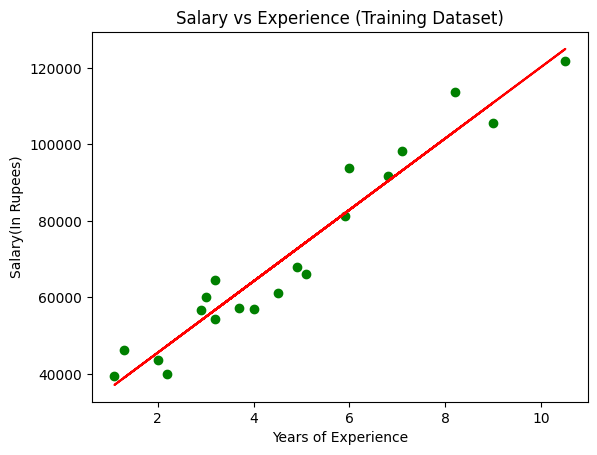

In [27]:
plt.scatter(xtrain,ytrain, color="green")
plt.plot(xtrain, xpred, color="red")
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show() 

## Step: 5. visualizing the Test set results:

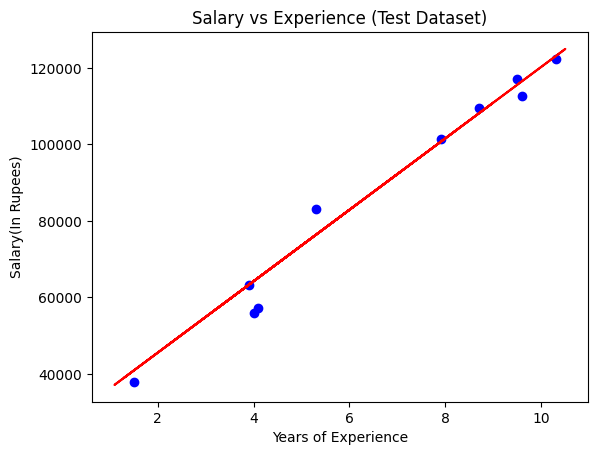

In [8]:
plt.scatter(xtest, ytest, color="blue")
plt.plot(xtrain, xpred, color="red")
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()

## Regression Accuracy Metrics

`sklearn` provides the numbers of metrics to evaluate accuracy.

## 1. Mean Absolute Error (MAE)

 Measures the average of absolute errors which is diffrence between the predicted and the actual values. the lower values better performance

In [9]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, ypred)
print("Mean Absolute Error (MAE): ", mae)


Mean Absolute Error (MAE):  3426.4269374307078


## 2. Mean Squared Error(MSE)

Calculates the average squared diffrence between predicted and actual values.Lower the values better performance but more senstive to outliers

Use for senstive predictions.

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error (MSE): ", mse)

Mean Squared Error (MSE):  21026037.329511296


## 3. Root Mean Squared Error (RMSE)

Square root of MSE, giving error in the same units as the target variable.

`RMSE:` Similar to MSE but easier to interpret. commonly used in regression tasks.

`Best For:` Measuring prediction error in the same units as the target variable.

`Common Usage:` Widely used in practical scenarios to compare models or interpret accuracy intuitively.

`Why:` Balances sensitivity to outliers and interpertability since its the same unit as the response variable

In [11]:
import numpy as np
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

Root Mean Squared Error (RMSE):  4585.4157204675885


## 4. R-Squared (R²)
Represents the proportion of variance in the dependent variable explained by the independent variable. Values close to 1 indicate a strong fit.

`R-Squared:` Checks goodness-of-fit. Higher values indicate the model explains more variance.

`Common Usage:` Often used in academic papers and reports to evaluate the goodness-of-fit of a regression model

`Why:` Provides a normalized measure (0 to 1) that is easy to understand, with higher values indicating a better fit.

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, ypred)
print("R-Squared (R²):", r2)

R-Squared (R²): 0.9749154407708353


## Metrics calculation by formula 

By using the above formulas, we can easily calculate them in Python

In [13]:
import numpy as np

#residual diffrence between actual and predicted 

d = ytest -ypred

#calculate metrics manually 

fmse = np.mean(d**2)
fmae = np.mean(abs(d))
frmse = np.sqrt(fmse)
fr2 = 1 - (sum(d**2)/-sum((ytest -np.mean(ytest))**2))

#print results
print("Results by manual calculations: ")
print("MAE:",fmae)
print("MSE:",fmse)
print("RMSE:",frmse)
print("R-Squared:",fr2)

Results by manual calculations: 
MAE: 3426.4269374307078
MSE: 21026037.329511296
RMSE: 4585.4157204675885
R-Squared: 1.0250845592291649


# Multiple Linear Regression Practice

lets import a dataset which has three columns two independant variables and one dependent variable

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [14]:
#imporing datasets
mlrdataset = pd.read_csv("multiple_linear_regression_dataset.csv")

We have already completed data preprocessing by importing libraries and dataset

In [15]:
mlrdataset.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


## Extracting Dependent and Independent variables: 

In [16]:
x = mlrdataset.iloc[:,:-1].values
y = mlrdataset.iloc[:, 2].values

## Now we are going to split the dataset into training and test set.

In [17]:
#splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
mlrxtrain, mlrxtest, mlrytrain,mlrytest = train_test_split(x,y,test_size=1/3, random_state=0)

## Step: 2- Fitting our MLR model to the training set.

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(mlrxtrain,mlrytrain)

LinearRegression()

In [39]:
#predicition of test set results;
mlrxpred = regressor.predict(mlrxtest)
mlrypred = regressor.predict(mlrxtrain)

## Step: 2:- Training and Test Score 

In [35]:
print("Train Score: ", regressor.score(mlrxtrain,mlrytrain))
print("Test Score: ", regressor.score(mlrxtest,mlrytest))

Train Score:  0.9899394523053604
Test Score:  0.9354503765243686


The above score tells that the model is 98.99 % accurate with training dataset & 93.54 % with test dataset

## Step: 4. Visualizing the Training set results:

here the `mlrxtrain`  is a `2D array` so selecting the first column in the array

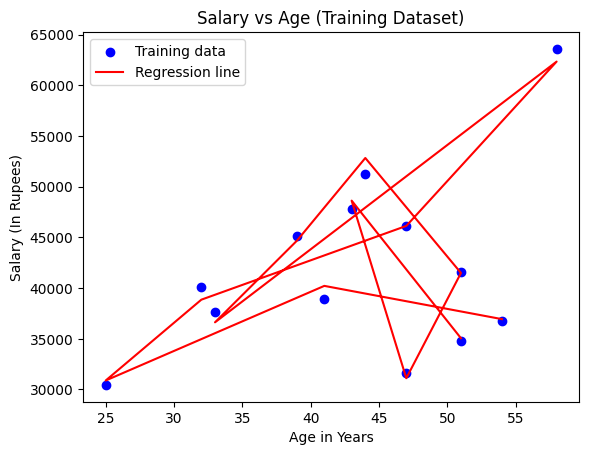

In [45]:
plt.scatter(mlrxtrain[:,0], mlrytrain, color="blue", label="Training data")
plt.plot(mlrxtrain[:,0], mlrypred, color="red",label="Regression line") 
plt.title("Salary vs Age (Training Dataset)") 
plt.xlabel("Age in Years") 
plt.ylabel("Salary (In Rupees)") 
plt.legend()
plt.show()

## Create a residual plot:

* Residuals are the differences between the actual values and the predicted values.
* Ploting the residuals to see if they are randomly distributed, which indicates a good fit.

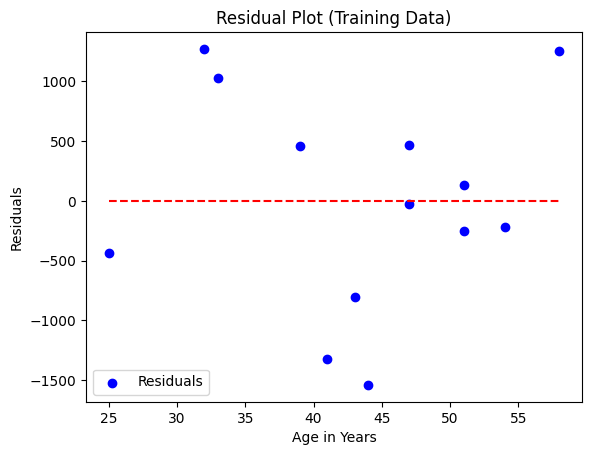

In [49]:
residuals = mlrytrain - mlrypred
# Scatter plot of residuals
plt.scatter(mlrxtrain[:, 0], residuals, color="blue", label="Residuals") 
plt.hlines(y=0, xmin=mlrxtrain[:, 0].min(), xmax=mlrxtrain[:, 0].max(), colors='red', linestyles='--')
plt.title("Residual Plot (Training Data)")
plt.xlabel("Age in Years")
plt.ylabel("Residuals")
plt.legend() 
# Show the plot 
plt.show()